# Install Packages

In [ ]:
pip install tldextract

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 4.2 MB/s eta 0:00:00


In [ ]:
!pip install transformers torch datasets wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install tqdm

# Version Set Up

In [ ]:
!pip install fasttext==0.9.2
!pip install numpy==1.26.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp311-cp311-linux_x86_64.whl size=4304106 sha256=3e6ed5066be1816bb93c5e2e624f6a837eaf7f2673982819dae6b4fb17544300
  Stored in directory: /root/.cache/pip/wheels/12/89/c9/c932d04c4dd65abe347bbb3e6f7668688753cbc585305ad8b7
Successfully built fasttext
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 105.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the foll

In [ ]:
# Check fasttext version
!pip show fasttext

Name: fasttext
Version: 0.9.2
Summary: fasttext Python bindings
Home-page: https://github.com/facebookresearch/fastText
Author: Onur Celebi
Author-email: celebio@fb.com
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, pybind11, setuptools
Required-by: 


In [ ]:
# Check numpy version
import numpy as np
print(f"numpy version: {np.__version__}")

numpy version: 1.26.0


# 1.Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Set the folder path
folder_path = '/content/drive/My Drive/Capstone/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2.Data Preprocessing

## 2.1 Loading and Cleaning Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the data set
data = pd.read_csv('/content/drive/My Drive/Capstone/malicious_phish.csv')

# Data cleansing: Remove null values and duplicate urls
data.dropna(subset=["url", "type"], inplace=True)
data = data.drop_duplicates(subset="url").copy()  # Use.copy() to ensure that operations on the data directly modify the copy

# Make sure the 'type' column is of string type
data['type'] = data['type'].astype(str)

# Tag coding: Converts category labels to numbers
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])

## 2.2 URL Type Distribution Visualization

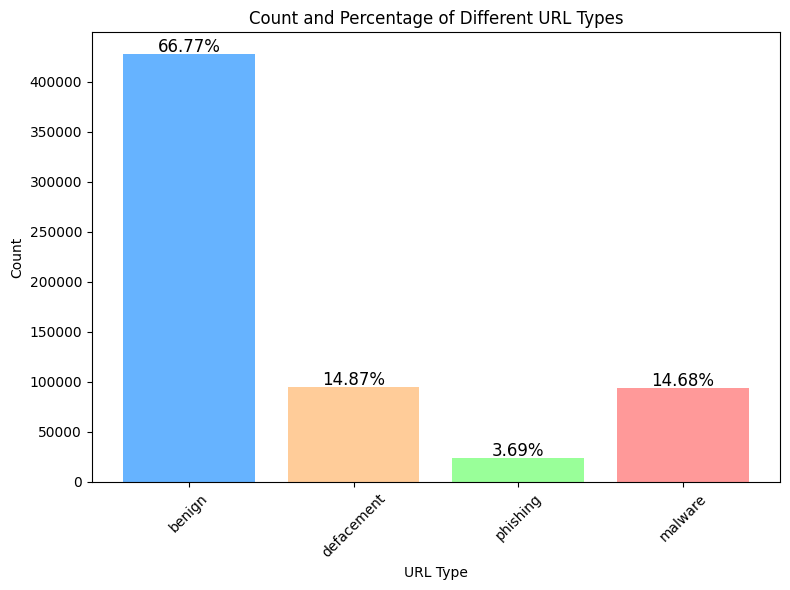

In [ ]:
# URL type distribution and its percentage
url_type_counts = data['type'].value_counts()
url_type_percentage = data['type'].value_counts(normalize=True) * 100

# Converts numeric labels to actual type labels
type_labels = label_encoder.inverse_transform(url_type_counts.index)

# Make sure the categories are sorted in the desired order
type_order = ['benign', 'defacement', 'phishing', 'malware']
type_order_numeric = label_encoder.transform(type_order)

# Resort url_type_counts and url_type_percentage
url_type_counts = url_type_counts.loc[type_order_numeric]
url_type_percentage = url_type_percentage.loc[type_order_numeric]

# Color configuration
colors = ['#66b3ff', '#ffcc99', '#ff9999', '#99ff99']

# Draw a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(url_type_counts.index, url_type_counts.values, color=colors)

# Add percentage
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 2000, f'{url_type_percentage.iloc[i]:.2f}%', ha='center', fontsize=12)

plt.xticks(ticks=range(len(type_labels)), labels=type_labels, rotation=45)
plt.title('Count and Percentage of Different URL Types')
plt.xlabel('URL Type')
plt.ylabel('Count')
plt.tight_layout()

# Save to Google Drive
plt.savefig(f'{folder_path}/url_type_distribution.png')
plt.show()

## 2.3 Divide the Training Set and Test Set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['url'], data['type'], test_size=0.2, random_state=42)

# 3.TF-IDF and CountVectorizer Feature Extraction

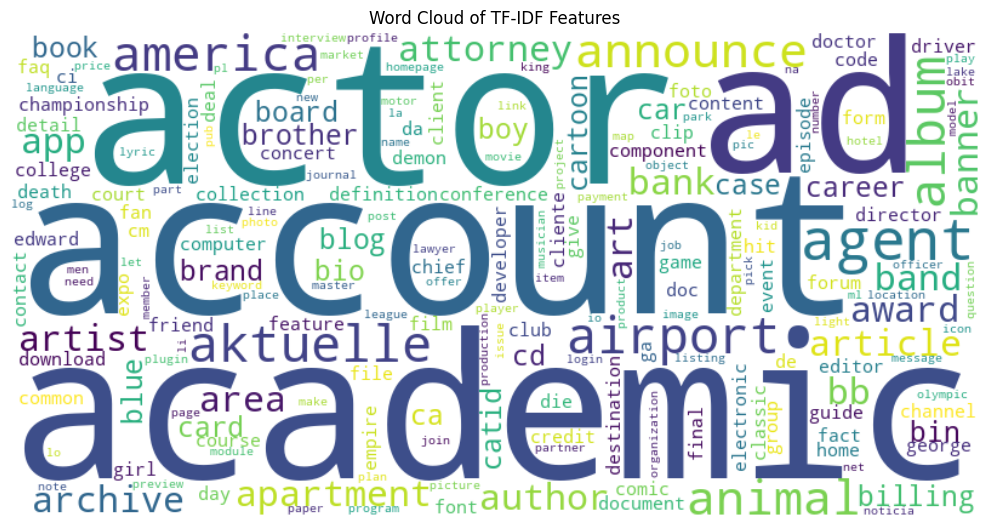

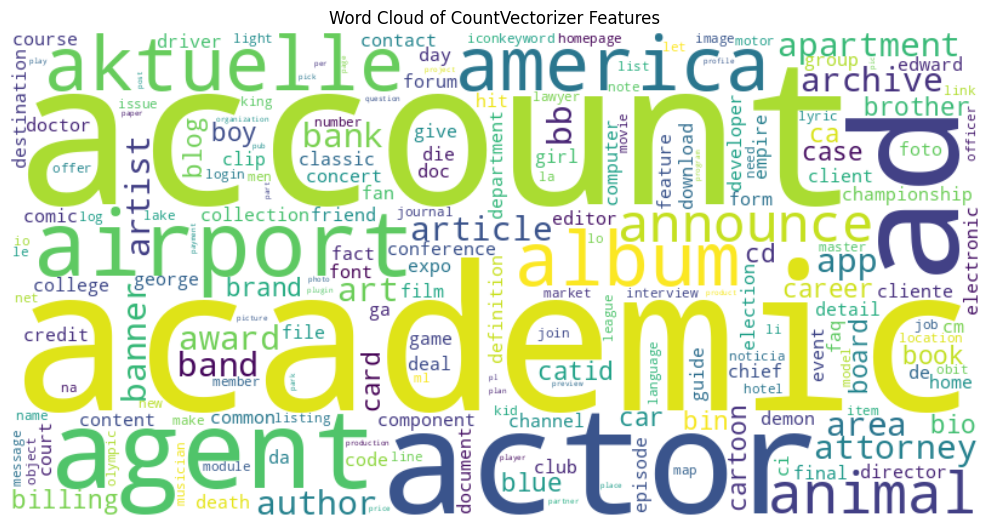

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

# Use TF-IDF feature extraction
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Generate TF-IDF word cloud
tfidf_words = " ".join(tfidf_vectorizer.get_feature_names_out())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tfidf_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of TF-IDF Features')
plt.tight_layout()
plt.savefig(f'{folder_path}/tfidf_wordcloud.png')
plt.show()

# Feature extraction using CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Generate CountVectorizer word cloud
count_words = " ".join(count_vectorizer.get_feature_names_out())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(count_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of CountVectorizer Features')
plt.tight_layout()
plt.savefig(f'{folder_path}/countvectorizer_wordcloud.png')
plt.show()

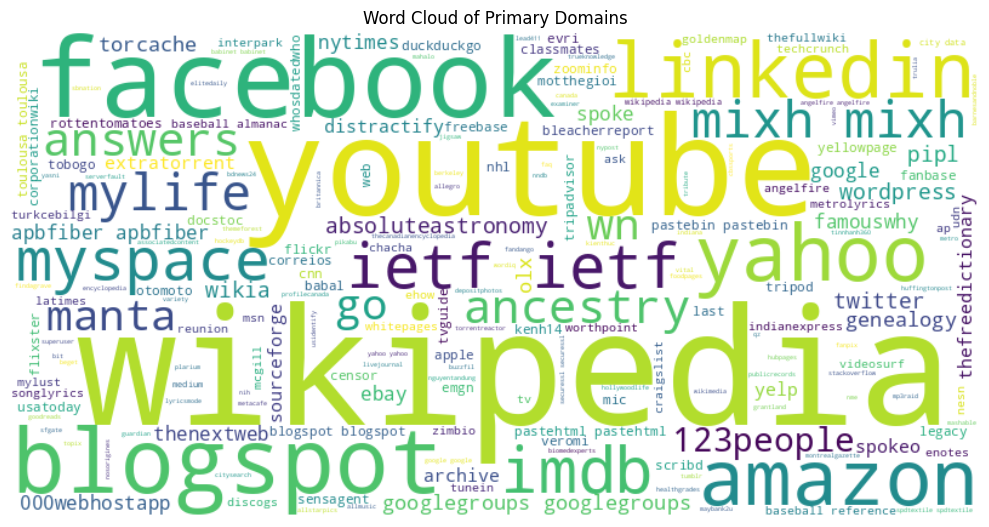

In [ ]:
import tldextract

# Extract the main domain name of the URL
data['domain'] = data['url'].apply(lambda x: tldextract.extract(x).domain)

# Generate word clouds
domain_text = " ".join(data['domain'])
domain_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(domain_text)

# Show word cloud
plt.figure(figsize=(10, 6))
plt.imshow(domain_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Primary Domains')
plt.tight_layout()

# Save to Google Drive
plt.savefig(f'{folder_path}/domain_wordcloud.png')
plt.show()

# 4.Model Training and Evaluation

## 4.1 Evaluation Function

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}\n")

    return {"Model": model_name, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}

## 4.2 Training Traditional Machine Learning（BoW & TF-IDF）
Logistic Regression (LR) and Naive Bayes (NB) are used for training, and features are extracted using BoW (CountVectorizer) and TF-IDF, respectively.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# Training Naive Bayes (BoW)
nb_bow = MultinomialNB()
nb_bow.fit(X_train_count, y_train)
y_pred_nb_bow = nb_bow.predict(X_test_count)
nb_bow_results = evaluate_model(y_test, y_pred_nb_bow, "Naive Bayes (BoW)")

# Training Naive Bayes (TF-IDF)
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_nb_tfidf = nb_tfidf.predict(X_test_tfidf)
nb_tfidf_results = evaluate_model(y_test, y_pred_nb_tfidf, "Naive Bayes (TF-IDF)")

# Training Logistic Regression (BoW)
lr_bow = LogisticRegression(max_iter=1000)
lr_bow.fit(X_train_count, y_train)
y_pred_lr_bow = lr_bow.predict(X_test_count)
lr_bow_results = evaluate_model(y_test, y_pred_lr_bow, "Logistic Regression (BoW)")

# Training Logistic Regression (TF-IDF)
lr_tfidf = LogisticRegression(max_iter=1000)
lr_tfidf.fit(X_train_tfidf, y_train)
y_pred_lr_tfidf = lr_tfidf.predict(X_test_tfidf)
lr_tfidf_results = evaluate_model(y_test, y_pred_lr_tfidf, "Logistic Regression (TF-IDF)")

Naive Bayes (BoW) Performance:
Accuracy: 0.8662, Precision: 0.8733, Recall: 0.8662, F1 Score: 0.8692

Naive Bayes (TF-IDF) Performance:
Accuracy: 0.8821, Precision: 0.8769, Recall: 0.8821, F1 Score: 0.8772

Logistic Regression (BoW) Performance:
Accuracy: 0.9367, Precision: 0.9348, Recall: 0.9367, F1 Score: 0.9340

Logistic Regression (TF-IDF) Performance:
Accuracy: 0.9322, Precision: 0.9301, Recall: 0.9322, F1 Score: 0.9288



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc,
    precision_recall_curve, average_precision_score,
    accuracy_score, f1_score
)

### Confusion Matrix

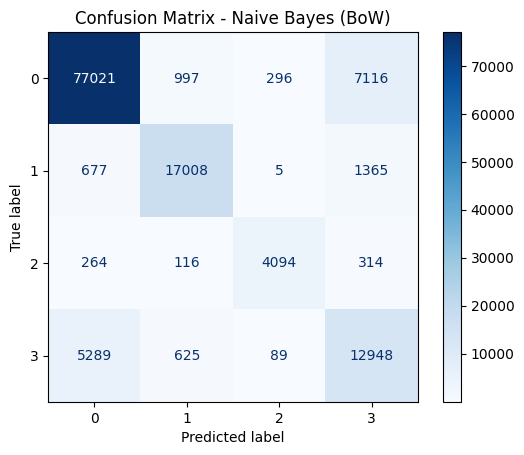

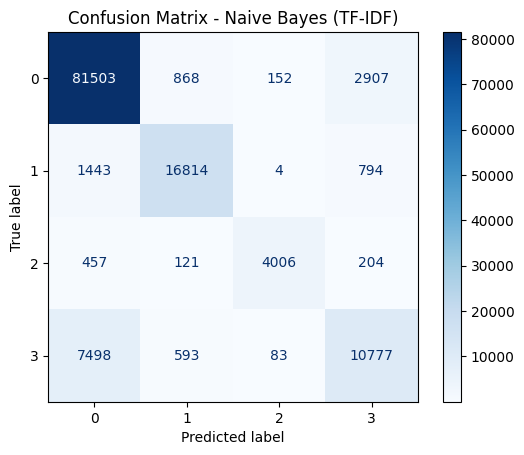

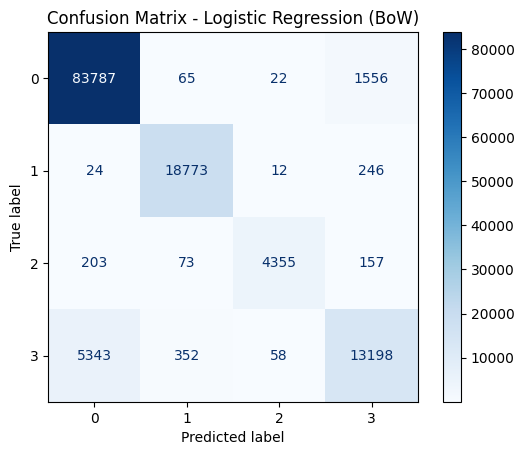

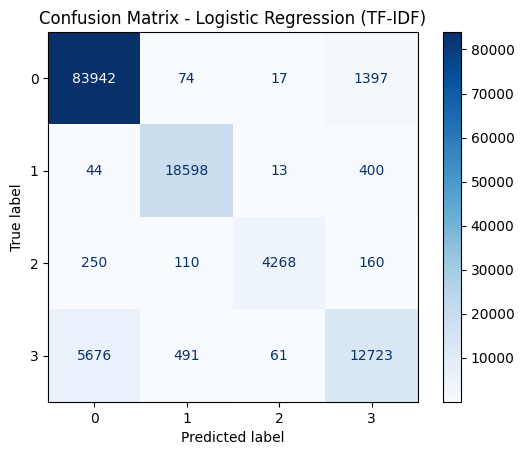

In [ ]:
models_preds = {
    "Naive Bayes (BoW)": y_pred_nb_bow,
    "Naive Bayes (TF-IDF)": y_pred_nb_tfidf,
    "Logistic Regression (BoW)": y_pred_lr_bow,
    "Logistic Regression (TF-IDF)": y_pred_lr_tfidf
}

for model_name, y_pred in models_preds.items():
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

### ROC Curve for Multiclass Classification

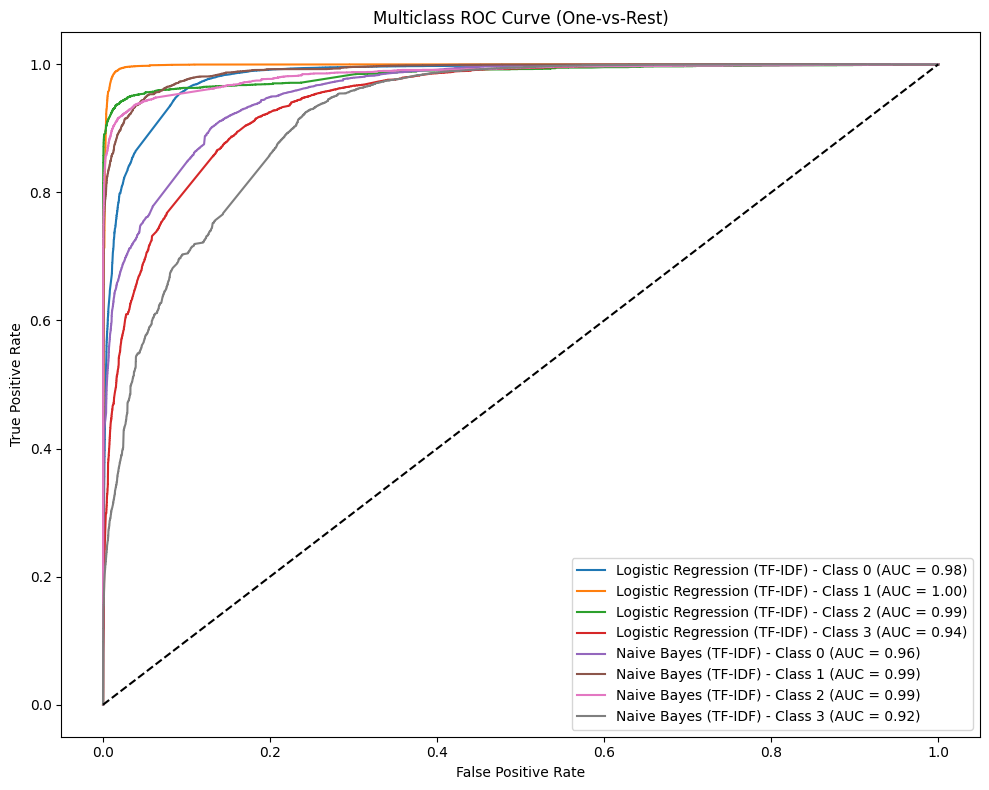

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# 将标签转为二进制格式（One-vs-Rest）
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])  # 对应 benign, defacement, phishing, malware
n_classes = y_test_bin.shape[1]

# 构建模型及其预测概率
models = {
    "Logistic Regression (TF-IDF)": make_pipeline(LogisticRegression(max_iter=1000),),
    "Naive Bayes (TF-IDF)": make_pipeline(MultinomialNB())
}

models_probs = {}

for model_name, model in models.items():
    if "Logistic" in model_name:
        model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
        model.fit(X_train_tfidf, label_binarize(y_train, classes=[0, 1, 2, 3]))
        y_score = model.predict_proba(X_test_tfidf)
    else:
        model = OneVsRestClassifier(MultinomialNB())
        model.fit(X_train_tfidf, label_binarize(y_train, classes=[0, 1, 2, 3]))
        y_score = model.predict_proba(X_test_tfidf)

    models_probs[model_name] = y_score

# 绘制多类别 ROC 曲线
plt.figure(figsize=(10, 8))

for model_name, y_score in models_probs.items():
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} - Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Multiclass ROC Curve (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig(f'{folder_path}/multiclass_roc.png')
plt.show()


### Precision-Recall Curve

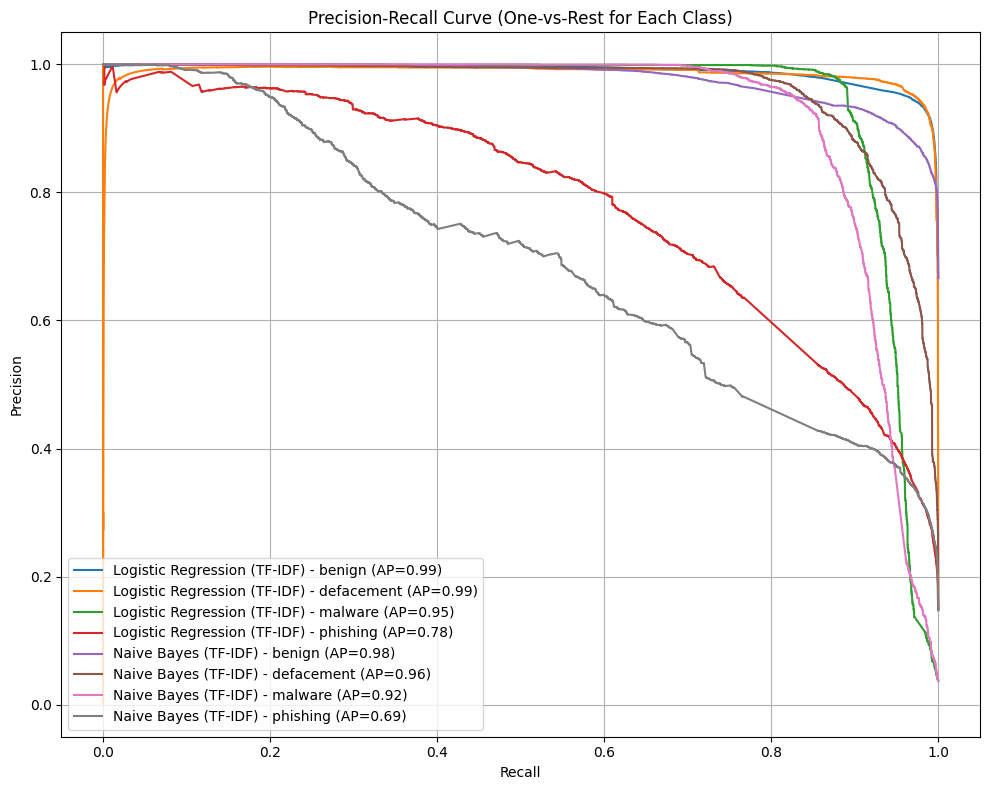

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# 对 y_test 进行 one-hot 编码
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])  # 注意类别顺序与 label_encoder 顺序一致
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(10, 8))

# 为每个模型绘图
for model_name, y_prob in models_probs.items():
    if y_prob.shape[1] != n_classes:
        print(f"{model_name} skipped due to mismatched class count")
        continue

    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
        ap_score = average_precision_score(y_test_bin[:, i], y_prob[:, i])
        label = label_encoder.inverse_transform([i])[0]  # 反编码获取标签名称
        plt.plot(recall, precision, label=f'{model_name} - {label} (AP={ap_score:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (One-vs-Rest for Each Class)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.savefig(f'{folder_path}/pr_curve_multiclass.png')
plt.show()


## 4.3 Training BERT, DistilBERT, RoBERTa

In [ ]:
import os
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation index
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {
        "accuracy": accuracy_score(labels, predictions),
        "precision": precision_score(labels, predictions, average='weighted'),
        "recall": recall_score(labels, predictions, average='weighted'),
        "f1": f1_score(labels, predictions, average='weighted')
    }

# Custom Dataset
class URLDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels.tolist()
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(text, truncation=True, padding="max_length", max_length=self.max_length, return_tensors="pt")
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "labels": torch.tensor(label, dtype=torch.long)
        }

# Training function
def train_transformer_model(model_name, X_train, y_train, X_test, y_test):
    model_path = f"/content/drive/My Drive/Capstone/Models/{model_name}"

    # If the model has already been trained, it is loaded directly
    if os.path.exists(model_path):
        print(f"Loading saved model: {model_path}")
        model = AutoModelForSequenceClassification.from_pretrained(model_path)
    else:
        print(f"Training model: {model_name}")
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=4, ignore_mismatched_sizes=True)

        train_dataset = URLDataset(X_train, y_train, tokenizer)
        test_dataset = URLDataset(X_test, y_test, tokenizer)

        training_args = TrainingArguments(
            output_dir=f"./{model_name}-results",
            evaluation_strategy="epoch",
            save_strategy="steps",
            save_steps=7000,
            learning_rate=2e-5,
            per_device_train_batch_size=16,
            per_device_eval_batch_size=16,
            num_train_epochs=2,
            weight_decay=0.01,
            logging_dir=f"./{model_name}-logs",
            logging_steps=1000,
            save_total_limit=1,
            fp16=True,
            gradient_checkpointing=True
        )

        trainer = Trainer(
            model=model,
            args=training_args,
            train_dataset=train_dataset,
            eval_dataset=test_dataset,
            compute_metrics=compute_metrics
        )

        trainer.train()
        model.save_pretrained(model_path)  # Save model

    # Predictive test set
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    test_dataset = URLDataset(X_test, y_test, tokenizer)
    trainer = Trainer(model=model)
    preds = trainer.predict(test_dataset).predictions
    y_pred = np.argmax(preds, axis=1)

    return compute_metrics((preds, y_test))

### 4.3.1 **BERT**

In [ ]:
bert_results = train_transformer_model("bert-base-uncased", X_train, y_train, X_test, y_test)
print("BERT Results:", bert_results)

Training model: bert-base-uncased


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: sdfgvddhgbdfhb (sdfgvddhgbdfhb-wenzhou-kean-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.055800,0.056493,0.986828,0.986750,0.986828,0.986749
2,0.036400,0.050433,0.989206,0.989200,0.989206,0.989187


BERT Results: {'accuracy': 0.9892063888195658, 'precision': 0.9891999903903097, 'recall': 0.9892063888195658, 'f1': 0.9891866233604009}


### 4.3.2 **DistilBERT**

In [ ]:
distilbert_results = train_transformer_model("distilbert-base-uncased", X_train, y_train, X_test, y_test)
print("DistilBERT Results:", distilbert_results)

Training model: distilbert-base-uncased


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: forcapstone71 (forcapstone71-wenzhou-kean-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.055900,0.052693,0.986890,0.986818,0.986890,0.986805
2,0.038300,0.049627,0.988668,0.988669,0.988668,0.988652


DistilBERT Results: {'accuracy': 0.9886760668829548, 'precision': 0.988677360456007, 'recall': 0.9886760668829548, 'f1': 0.9886601288587008}


### 4.3.3 **RoBERTa**

In [ ]:
roberta_results = train_transformer_model("roberta-base", X_train, y_train, X_test, y_test)
print("RoBERTa Results:", roberta_results)

Training model: roberta-base


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: qish (qish-wenzhou-kean-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.072600,0.063584,0.985096,0.984996,0.985096,0.984978
2,0.052700,0.056283,0.987818,0.987826,0.987818,0.987807


RoBERTa Results: {'accuracy': 0.9878259920139756, 'precision': 0.9878334273592374, 'recall': 0.9878259920139756, 'f1': 0.9878141775327561}


# 5. Feature Fusion

## Hugging Face Token Setting Check

In [ ]:
from huggingface_hub import login

# Try logging on Hugging Face
login()

In [ ]:
from google.colab import auth
auth.authenticate_user()  # This will prompt you to enter your Hugging Face token


In [ ]:
import os
os.environ['HF_TOKEN'] = 'xxx'


In [ ]:
import os
print(os.getenv('HF_TOKEN'))


## Feature-Level Fusion

In [ ]:
import torch
import numpy as np
import random
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import AutoTokenizer, AutoModel
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer

# Convert to list
X_train = X_train.astype(str).tolist()
X_test = X_test.astype(str).tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

# Set the number of samples (can be adjusted according to the memory)
train_sample_size = 50000
test_sample_size = 20000

# Set random seeds
random.seed(42)

# Sampling training set
indices_train = random.sample(range(len(X_train)), min(train_sample_size, len(X_train)))
X_train_sampled = [X_train[i] for i in indices_train]
y_train_sampled = [y_train[i] for i in indices_train]

# Sample test set
indices_test = random.sample(range(len(X_test)), min(test_sample_size, len(X_test)))
X_test_sampled = [X_test[i] for i in indices_test]
y_test_sampled = [y_test[i] for i in indices_test]

# BERT feature extraction function
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

def process_with_bert(text):
    # Divide the text into words
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    # Gets BERT features and converts negative values to zero
    features = outputs.last_hidden_state.mean(dim=1)
    features = torch.relu(features)  # ReLU activates the function to change negative values to zero
    return features

# Processing BERT features
X_train_bert = []
for text in tqdm(X_train_sampled, desc="Processing BERT"):
    X_train_bert.append(process_with_bert(text).numpy().flatten())

X_test_bert = []
for text in tqdm(X_test_sampled, desc="Processing BERT"):
    X_test_bert.append(process_with_bert(text).numpy().flatten())

# Use TF-IDF and BoW features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
count_vectorizer = CountVectorizer(max_features=1000)

# Calculate TF-IDF features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_sampled).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test_sampled).toarray()

# Calculate BoW feature
X_train_bow = count_vectorizer.fit_transform(X_train_sampled).toarray()
X_test_bow = count_vectorizer.transform(X_test_sampled).toarray()

# Merge BERT, TF-IDF, and BoW features
X_train_dict = np.hstack([X_train_bert, X_train_tfidf, X_train_bow])
X_test_dict = np.hstack([X_test_bert, X_test_tfidf, X_test_bow])

# check staple length
print(f"X_train_dict Sample number: {X_train_dict.shape[0]}")
print(f"X_train_sampled sample number: {len(X_train_sampled)}")
if X_train_dict.shape[0] == len(X_train_sampled):
    print("X_train_dict and X_train_sampled have the same sample number!")
else:
    print("X_train_dict and X_train_sampled sampled samples are inconsistent!")

# ========== Model Training ==========
stacking_clf = StackingClassifier(
    estimators=[
        ('logistic_regression', LogisticRegression())
    ],
    final_estimator=LogisticRegression()
)

stacking_clf.fit(X_train_dict, y_train_sampled)

# ========== Model Prediction ==========
y_pred = stacking_clf.predict(X_test_dict)

# Model evaluation
accuracy = accuracy_score(y_test_sampled, y_pred)
precision = precision_score(y_test_sampled, y_pred, average='macro')
recall = recall_score(y_test_sampled, y_pred, average='macro')
f1 = f1_score(y_test_sampled, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Processing BERT: 100%|██████████| 20000/20000 [41:26<00:00,  8.04it/s]


X_train_dict Sample number: 50000
X_train_sampled sample number: 50000
X_train_dict and X_train_sampled have the same sample number!


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy: 0.958
Precision: 0.9511615337883708
Recall: 0.9212225015456528
F1 Score: 0.9353687099058108


## 6. Results Visualization

In [ ]:
# Manually enter the evaluation results obtained earlier for each model
nb_bow_results = {
    "Model": "Naive Bayes (BoW)",
    "Accuracy": 0.8663,
    "Precision": 0.8733,
    "Recall": 0.8663,
    "F1 Score": 0.8692
}

nb_tfidf_results = {
    "Model": "Naive Bayes (TF-IDF)",
    "Accuracy": 0.8820,
    "Precision": 0.8769,
    "Recall": 0.8820,
    "F1 Score": 0.8772
}

lr_bow_results = {
    "Model": "Logistic Regression (BoW)",
    "Accuracy": 0.9366,
    "Precision": 0.9347,
    "Recall": 0.9366,
    "F1 Score": 0.9339
}

lr_tfidf_results = {
    "Model": "Logistic Regression (TF-IDF)",
    "Accuracy": 0.9326,
    "Precision": 0.9305,
    "Recall": 0.9326,
    "F1 Score": 0.9293
}

bert_results = {
    "Model": "BERT",
    "Accuracy": 0.9892,
    "Precision": 0.9892,
    "Recall": 0.9892,
    "F1 Score": 0.9892
}

distilbert_results = {
    "Model": "DistilBERT",
    "Accuracy": 0.9887,
    "Precision": 0.9887,
    "Recall": 0.9887,
    "F1 Score": 0.9887
}

roberta_results = {
    "Model": "RoBERTa",
    "Accuracy": 0.9878,
    "Precision": 0.9878,
    "Recall": 0.9878,
    "F1 Score": 0.9878
}

lr_fusion_results = {
    "Model": "Logistic Regression (Feature Fusion)",
    "Accuracy": 0.9580,
    "Precision": 0.9512,
    "Recall": 0.9212,
    "F1 Score": 0.9354
}

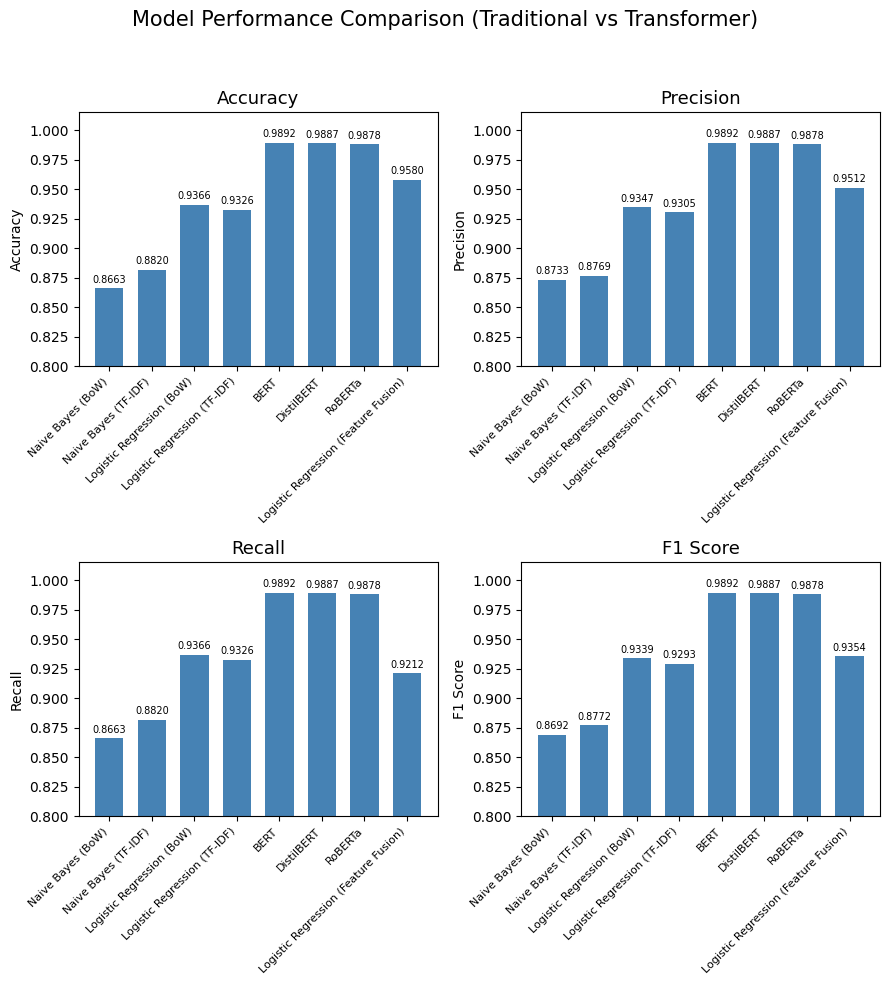

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 模型结果列表
models = [
    nb_bow_results,
    nb_tfidf_results,
    lr_bow_results,
    lr_tfidf_results,
    bert_results,
    distilbert_results,
    roberta_results,
    lr_fusion_results
]

model_names = [m["Model"] for m in models]
accuracies = [m["Accuracy"] for m in models]
precisions = [m["Precision"] for m in models]
recalls = [m["Recall"] for m in models]
f1_scores = [m["F1 Score"] for m in models]

metrics = {
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores
}

# 设置图表布局，增高整体图像高度
fig, axs = plt.subplots(2, 2, figsize=(9, 10))  # 原来是 (9, 8)
axes = axs.flatten()

x = np.arange(len(model_names)) * 0.3  # 柱子靠近
bar_width = 0.2  # 柱子窄一点

for i, (metric_name, metric_values) in enumerate(metrics.items()):
    ax = axes[i]
    bars = ax.bar(x, metric_values, width=bar_width, color='steelblue')
    ax.set_title(metric_name, fontsize=13)
    ax.set_ylabel(metric_name)
    ax.set_ylim(0.8, 1.015)  # 提高 y 轴上限，避免数值溢出
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=45, ha='right', fontsize=8)

    # 添加数值标签，向上挪一点
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height + 0.003, f'{height:.4f}',
                ha='center', va='bottom', fontsize=7)

fig.suptitle('Model Performance Comparison (Traditional vs Transformer)', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 给标题留空间
plt.show()
